# Mise en place du notebook

## Import des modules

In [8]:
# imports pour le développement
import mesfonctions
from importlib import reload
mesfonctions = reload(mesfonctions)

# imports pour la production
import warnings
from IPython.core.display import HTML
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib import rcParams
from cycler import cycler
from sklearn import cluster, manifold, decomposition, preprocessing
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AffinityPropagation, MeanShift, Birch
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score, rand_score, confusion_matrix, accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, fclusterdata
from mesfonctions import display_scree_plot, draw_tsne, draw_umap, accuracy_svm
import pickle
from termcolor import colored, cprint
import cv2
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
import disarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model

## Constantes

In [9]:
PATH = "Images_Flipkart/"

## Gestion des paramètres d'affichage de Jupyter

In [10]:
plt.style.use('seaborn')

warnings.filterwarnings(category=FutureWarning, action='ignore')

# pour gérer l'affichage des dataframes pandas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200
pd.set_option("colheader_justify", "left")

# pour gérer l'affichage des arrays numpy
# 230 sur config bureau, 165 sur config portable
np.set_printoptions(linewidth=165)

# pour afficher les gros fichiers sur toute la largeur de l'écran
HTML("<style>.container { width:95% }</style>")

# Chargement du dataframe

In [11]:
df_source = pickle.load(open('df_source.pkl', 'rb'))
df_source

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,label,int_label
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,4
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,2
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,2
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,4
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,2
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,2
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,2
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,h

In [12]:
labels = ["Beauty and Personal Care", "Computers", "Baby Care", "Home Decor", "Home Furnishing", "Kitchen & Dining", "Watches"]

# VGG-16

## Feature extraction

On déroule cette méthodologie :  
    https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/  
Chapitre : Pre-Trained Model as Feature Extractor Preprocessor  

In [13]:
def VGG16_extracteur(nom_image='cat.jpg'):
    # load an image from file
    image = load_img(nom_image, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # load model
    model = VGG16()
    # remove the output layer
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    # get extracted features
    im_features = model.predict(image)
    return im_features


# test unitaire
VGG16_extracteur()

array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
def nom_fichier_photo(index, df=None):
    """Retourne le chemin + nom du fichier jpg d'une ligne de dataframe.
    Args : 
    - index : index de la ligne de df.
    Returns :
    - string.
    """
    if df is None:
        df = df_source
    return PATH + df['image'][index]

In [ ]:
list_features = []
for i in range(len(df_source)):
    if i % 10 == 0:
        print(i, "", end='')
    nom_image = nom_fichier_photo(i)
    list_features.append(VGG16_extracteur(nom_image))

In [38]:
# Sauvegarde des descripteurs calculés (pickle)
pickle.dump(list_features, open('list_features_VGG16.pkl', 'wb'))

In [16]:
# Chargement des descripteurs calculés (pickle)
list_features = pickle.load(open('list_features_VGG16.pkl', 'rb'))

In [17]:
arr_features = np.asarray(list_features)
display (arr_features)

array([[[3.3986144 , 0.8595722 , 0.        , ..., 0.        , 0.8510551 , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 1.2970998 , 0.        , 0.        ]],

       ...,

       [[2.1961298 , 2.3982751 , 2.6236405 , ..., 2.159872  , 0.18472159, 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        , 0.24833043, 0.9251383 ]],

       [[0.        , 0.        , 0.1231316 , ..., 0.        , 0.5277166 , 2.9917495 ]]], dtype=float32)

In [18]:
arr_features = np.concatenate(arr_features, axis=0)
display (arr_features)

array([[3.3986144 , 0.8595722 , 0.        , ..., 0.        , 0.8510551 , 0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , ..., 1.2970998 , 0.        , 0.        ],
       ...,
       [2.1961298 , 2.3982751 , 2.6236405 , ..., 2.159872  , 0.18472159, 0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.24833043, 0.9251383 ],
       [0.        , 0.        , 0.1231316 , ..., 0.        , 0.5277166 , 2.9917495 ]], dtype=float32)

In [19]:
arr_features.shape

(1050, 4096)

## Réduction de dimension

### Réduction de dimension PCA

Dimensions dataset avant réduction PCA :  (1050, 4096)
Dimensions dataset après réduction PCA :  (1050, 850)


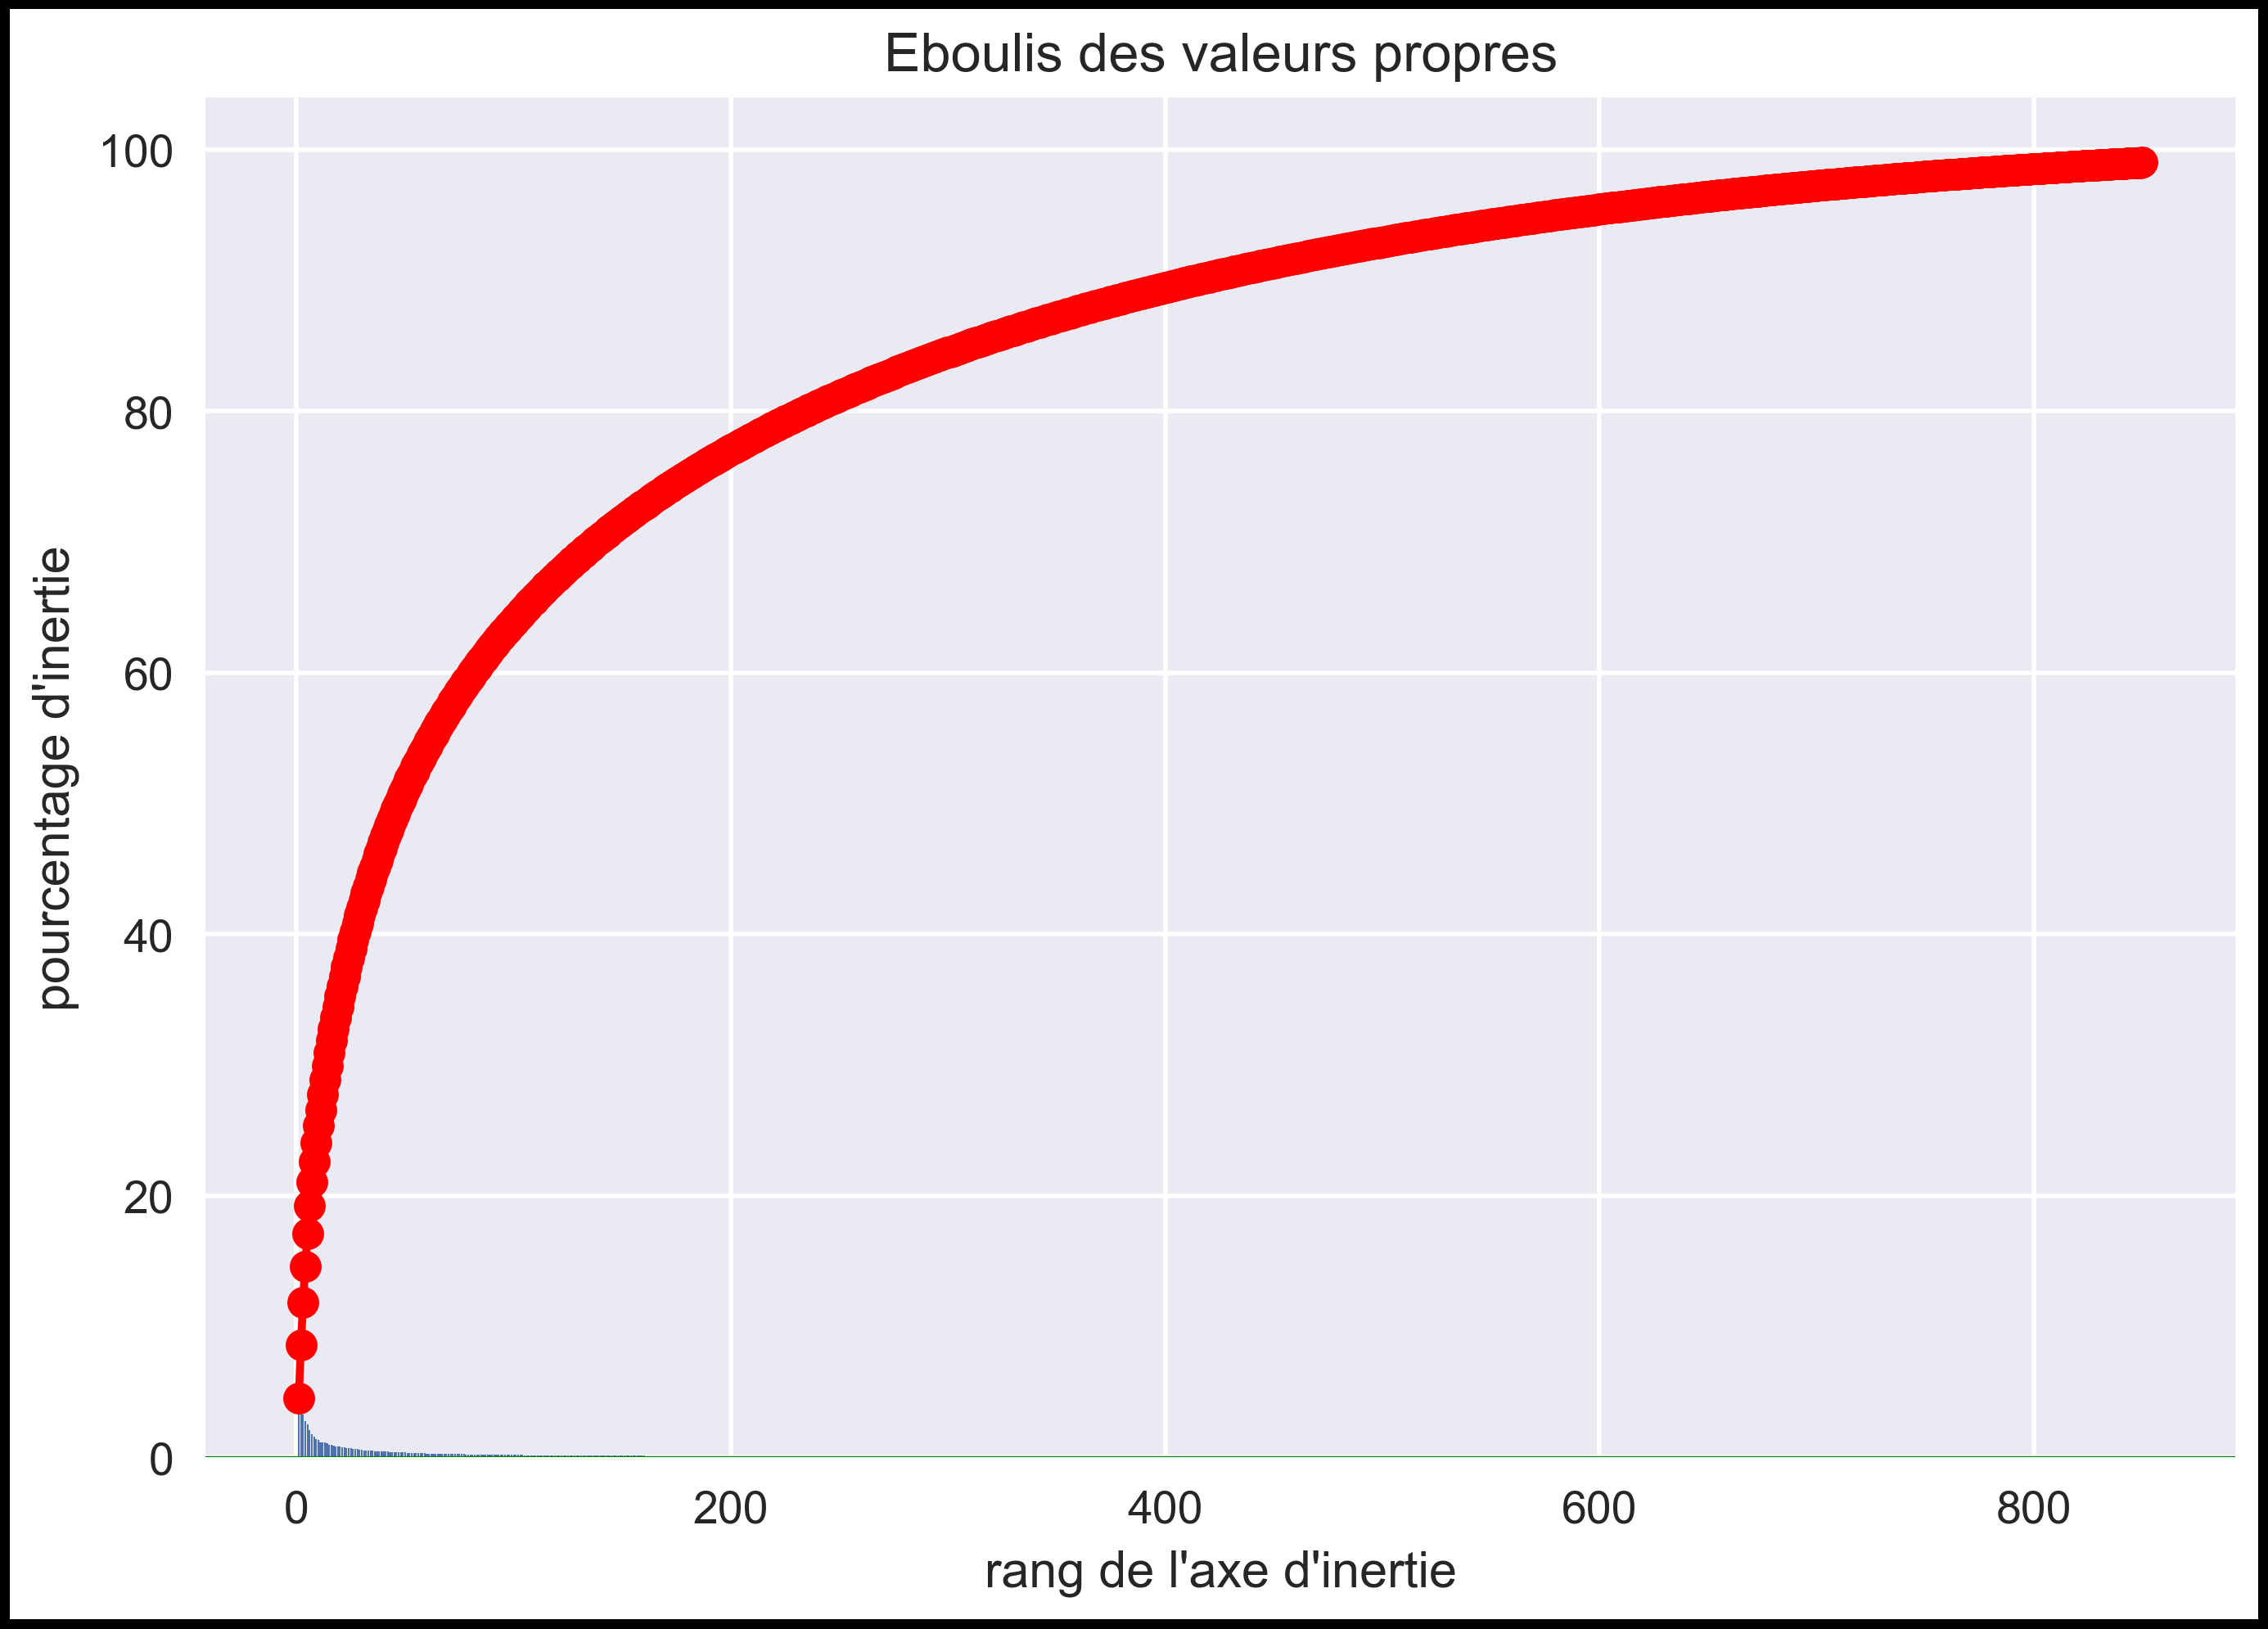

In [20]:
print("Dimensions dataset avant réduction PCA : ", arr_features.shape)
pca = decomposition.PCA(n_components=0.99)
arr_features_scaled = preprocessing.StandardScaler().fit_transform(
    arr_features)   # données centrées réduites
feat_pca = pca.fit_transform(arr_features_scaled)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)
display_scree_plot(pca, dpi=400)

### Visualisation par t-SNE

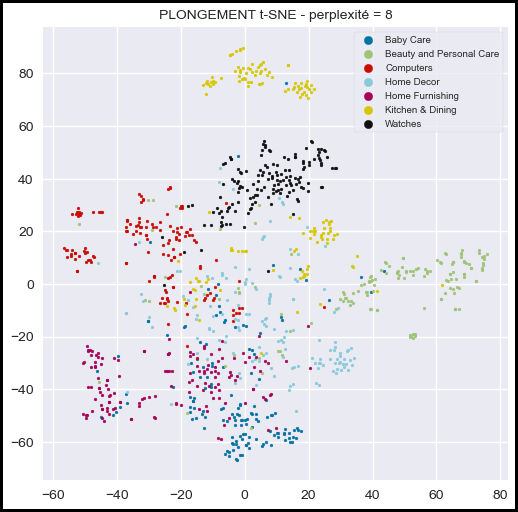

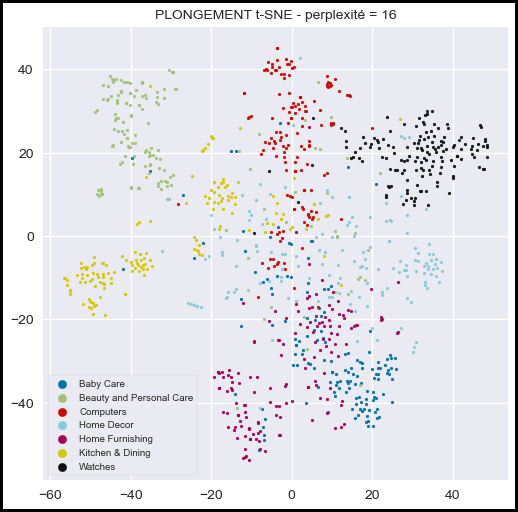

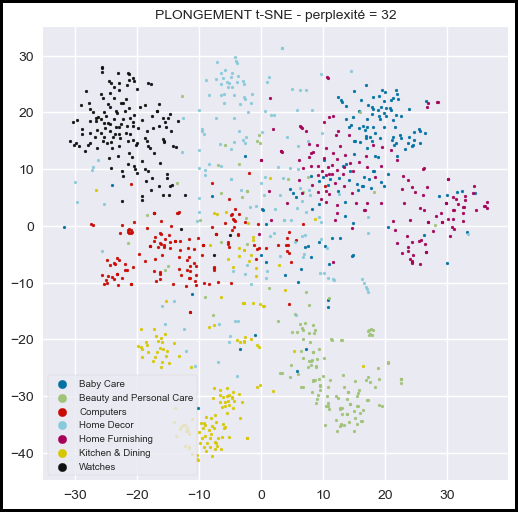

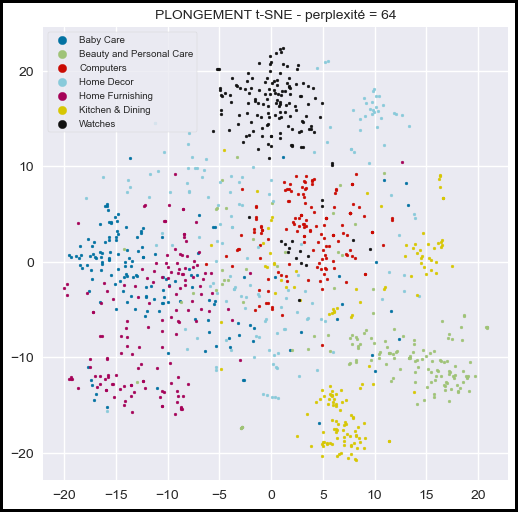

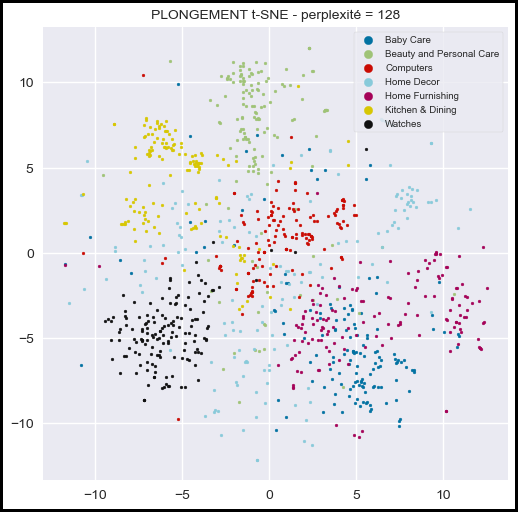

In [73]:
perplexities = [8, 16, 32, 64, 128]
draw_tsne(feat_pca, perplexities, df_source['label'])

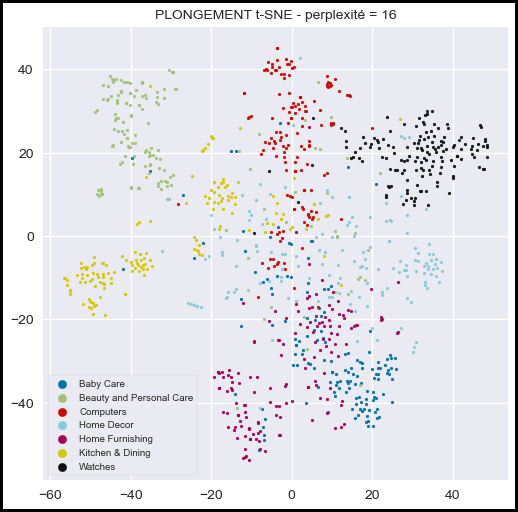

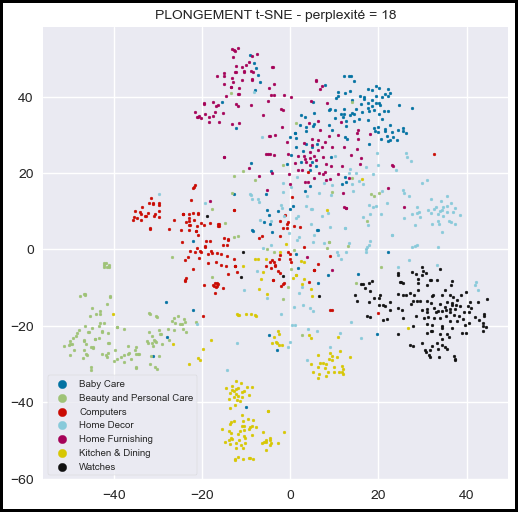

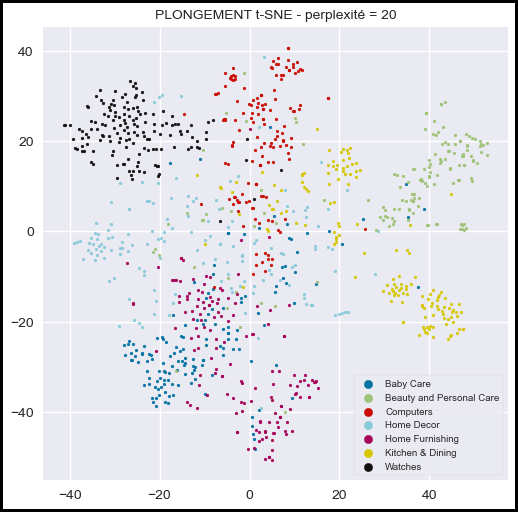

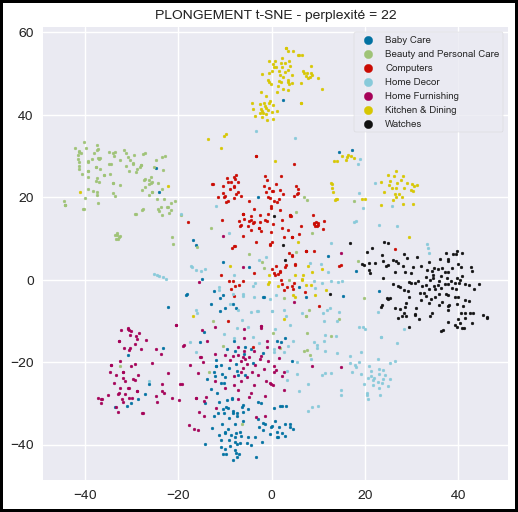

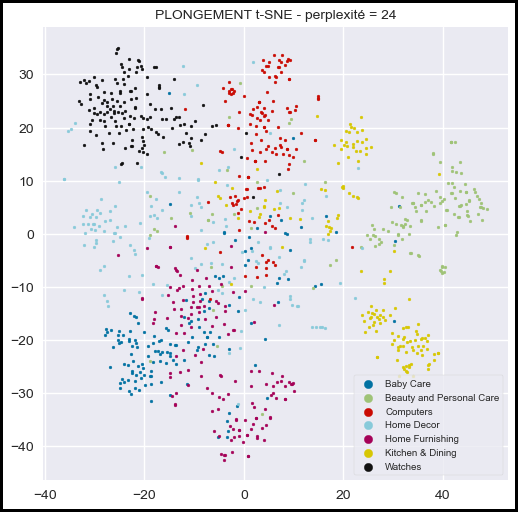

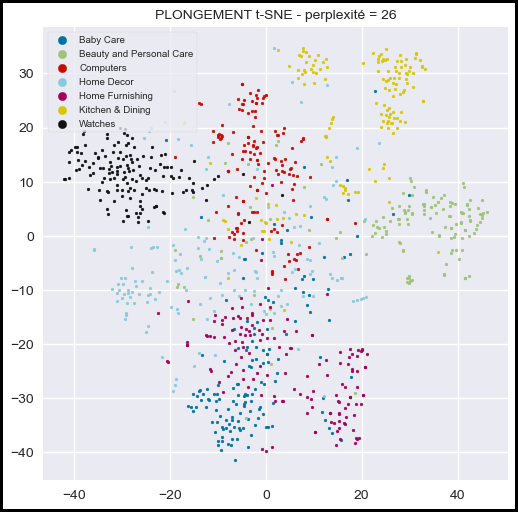

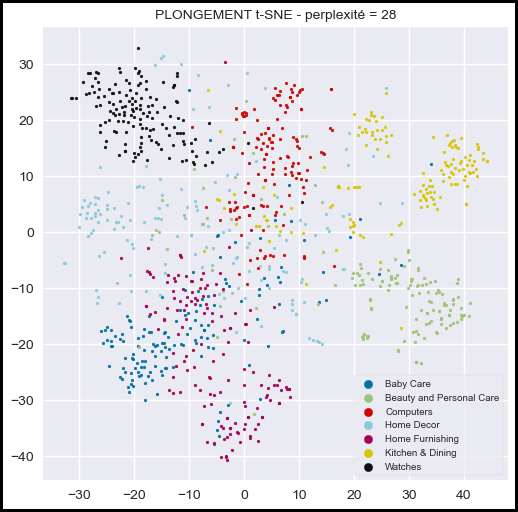

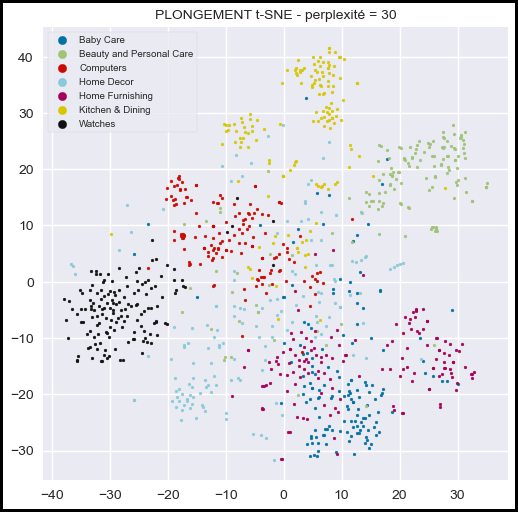

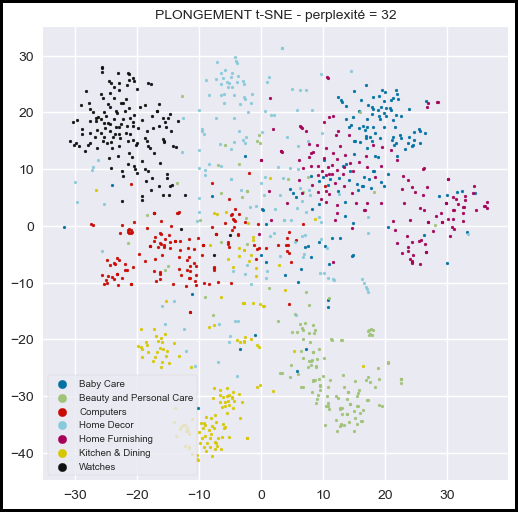

In [74]:
perplexities = range(16, 33, 2)
draw_tsne(feat_pca, perplexities, df_source['label'])

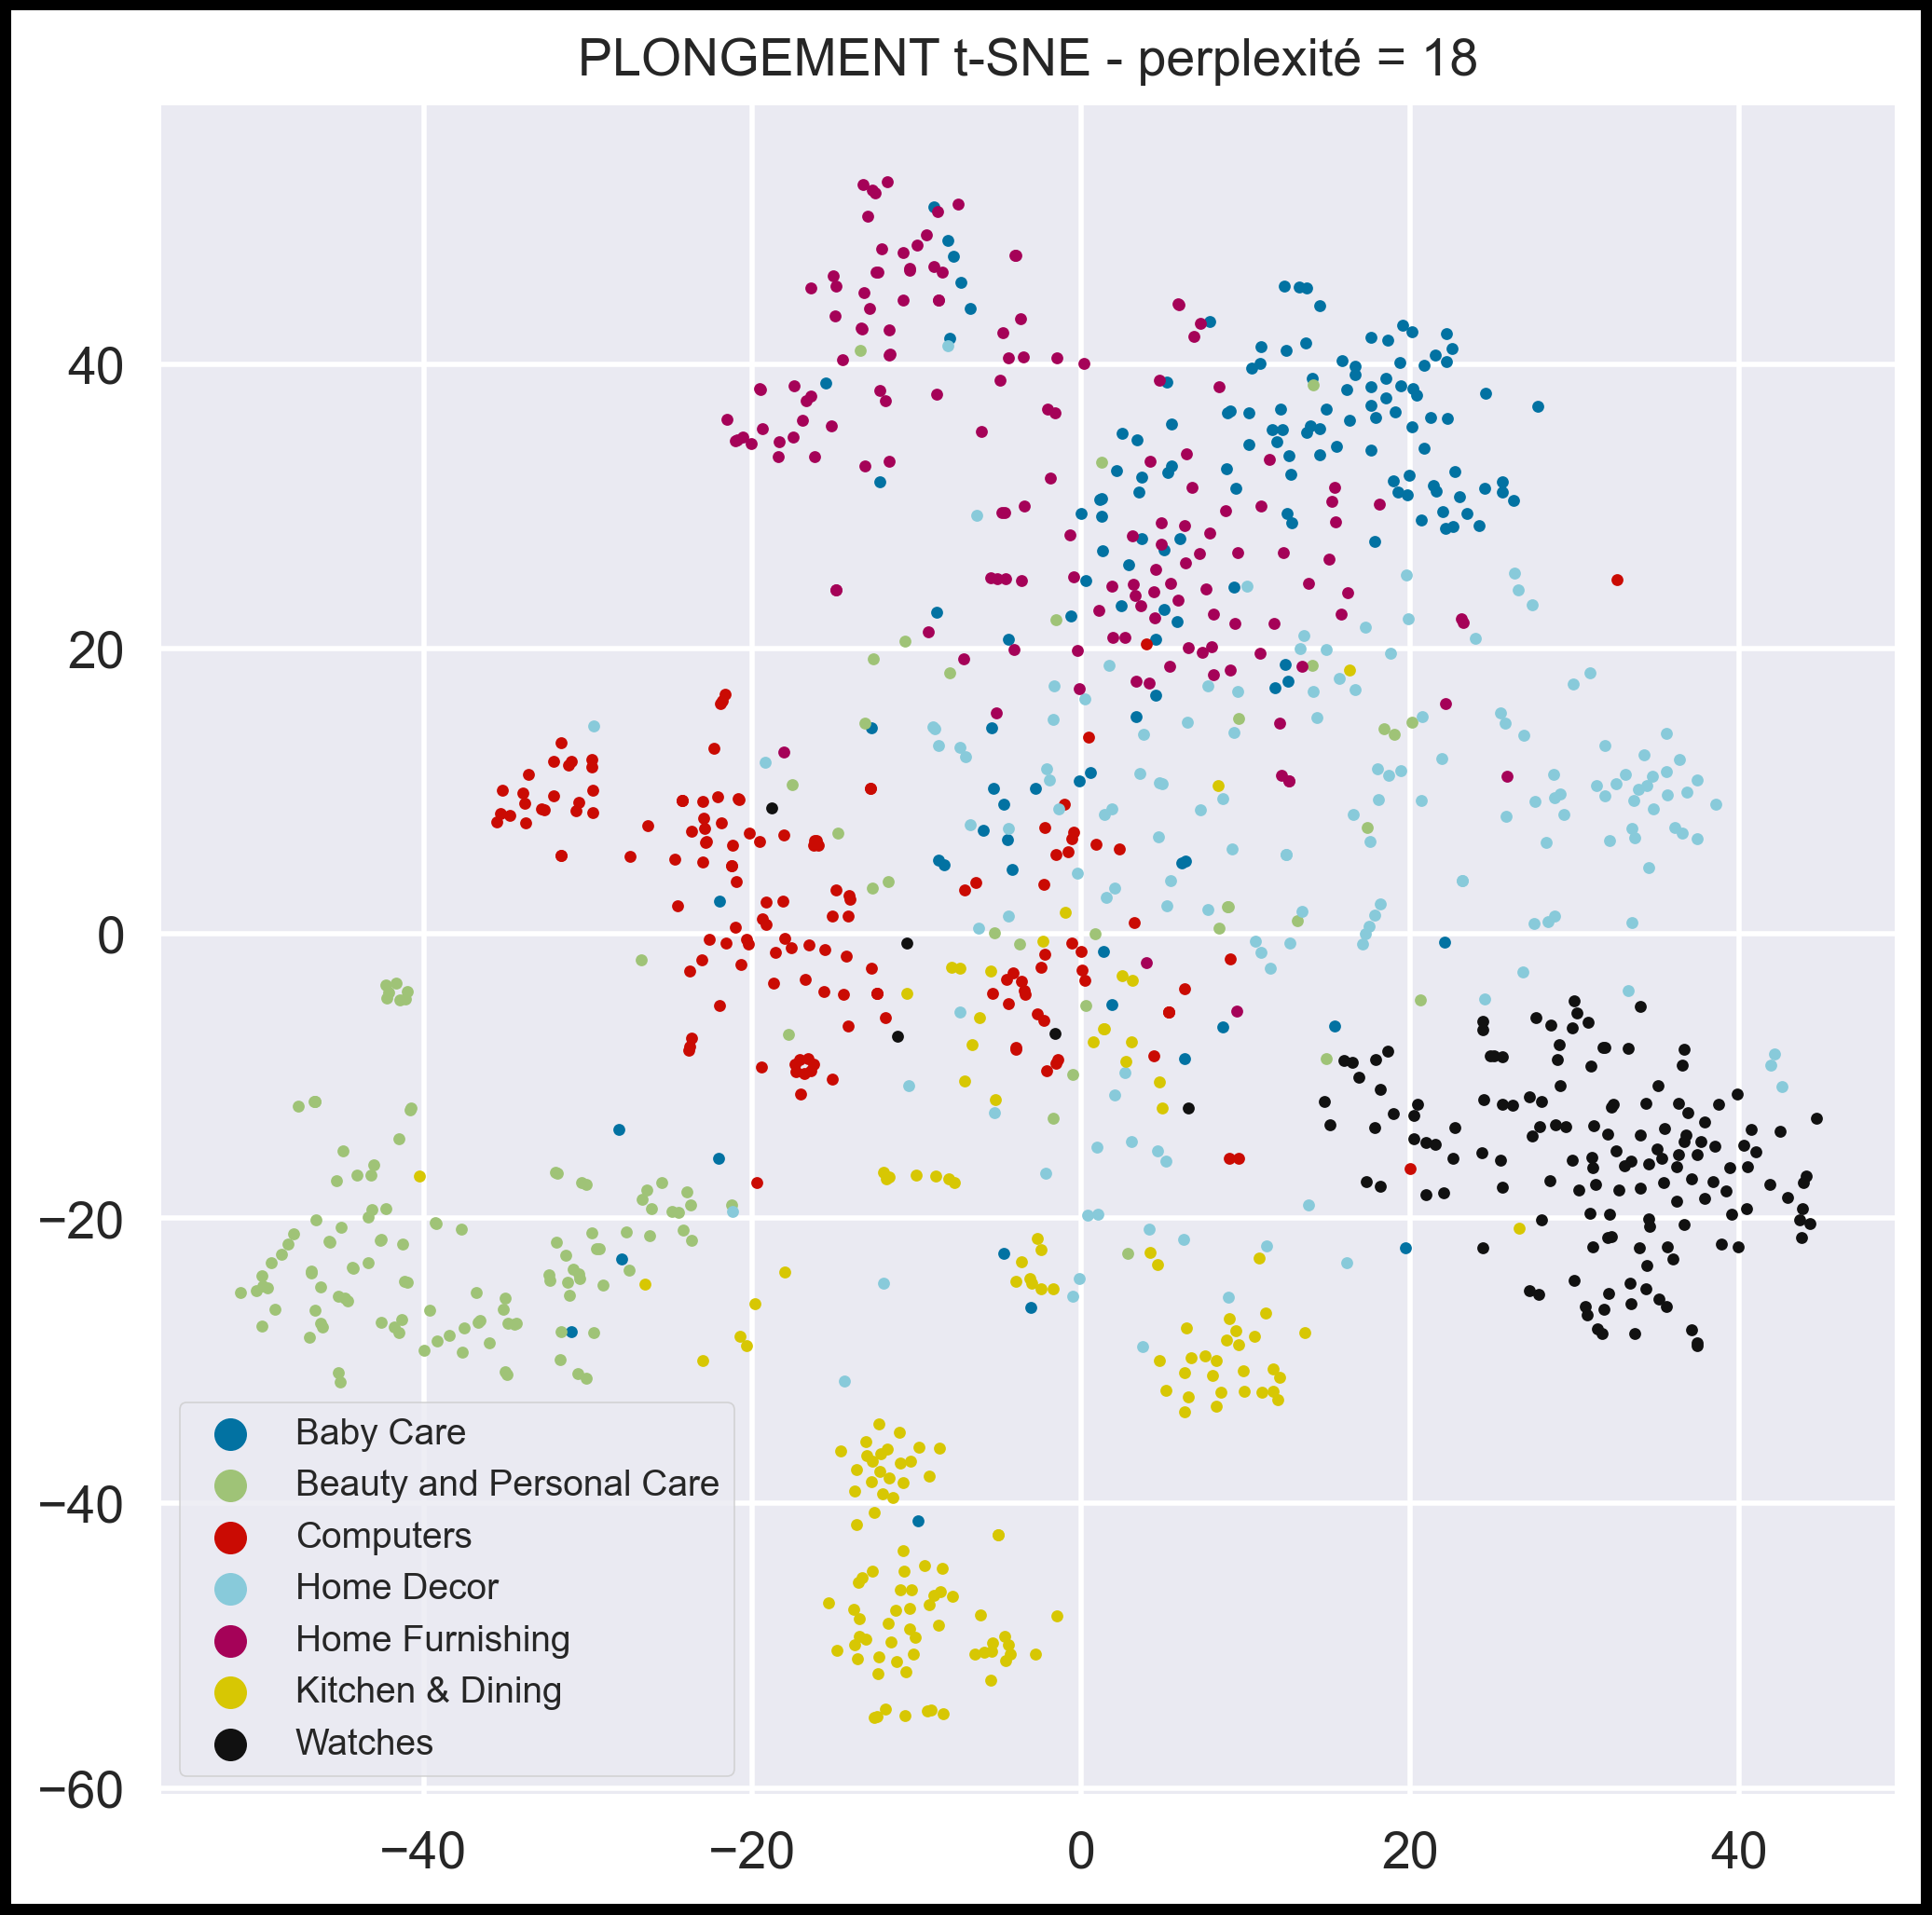

In [75]:
draw_tsne(feat_pca, [18], df_source['label'], dpi=400)

### Visualisation par UMAP

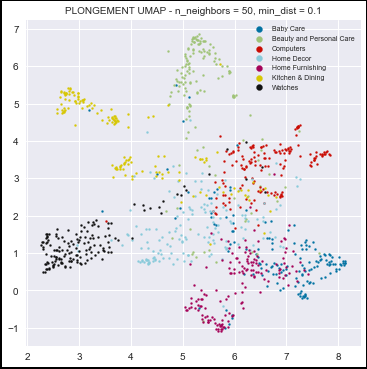

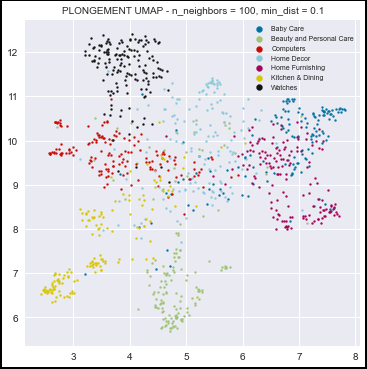

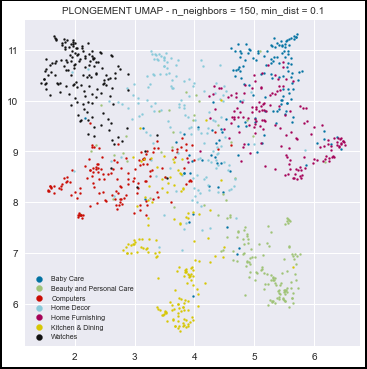

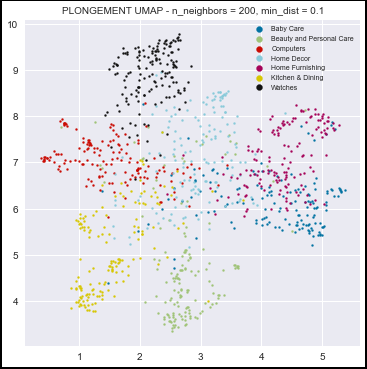

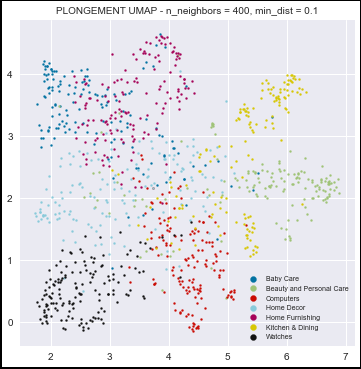

In [15]:
plt.style.use('seaborn')
for n_neighbors in (50, 100, 150, 200, 400):
    draw_umap(feat_pca, df_source['label'], n_neighbors)

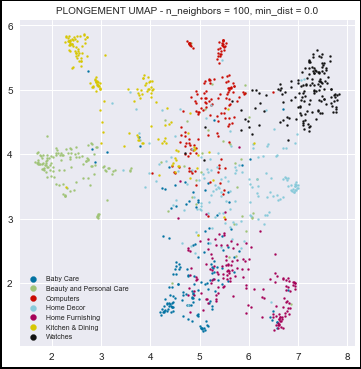

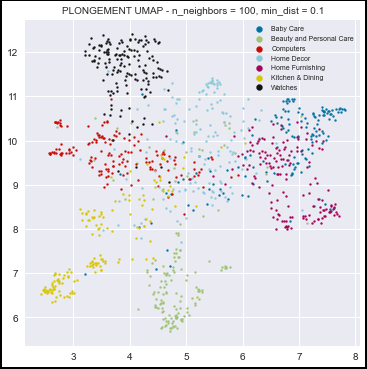

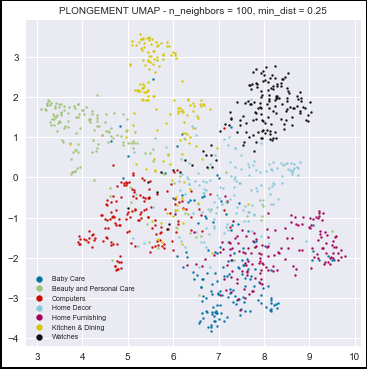

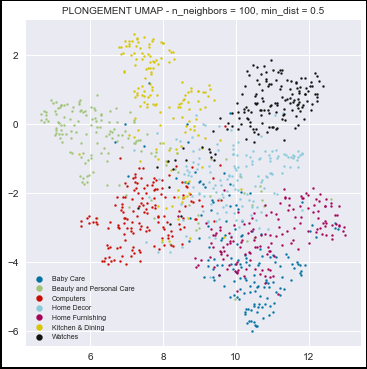

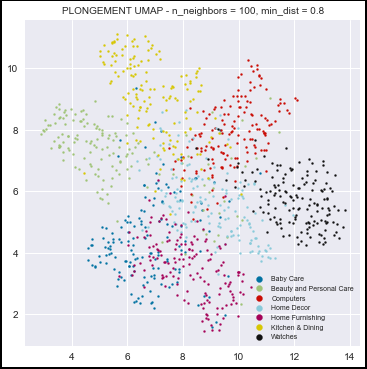

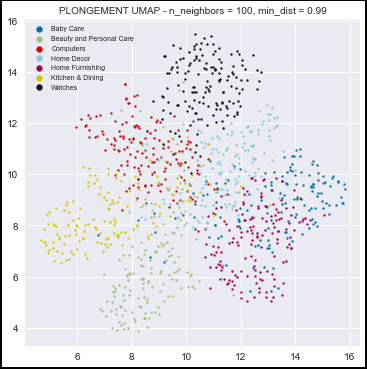

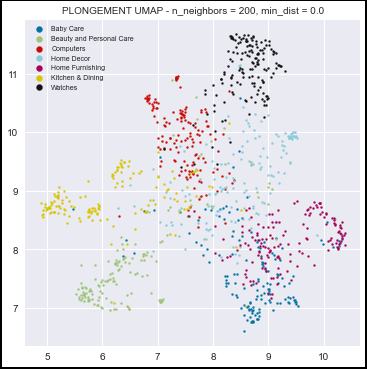

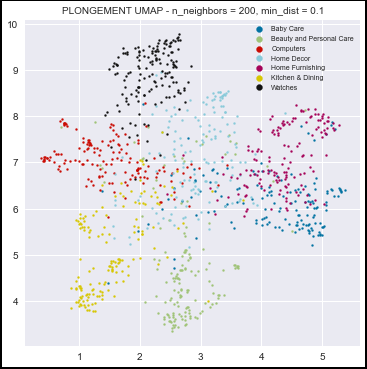

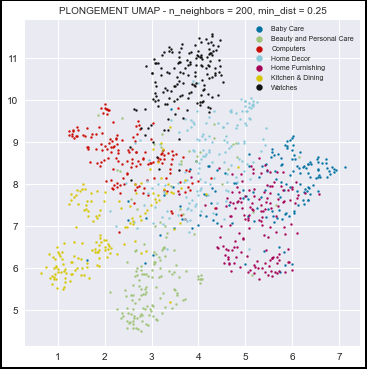

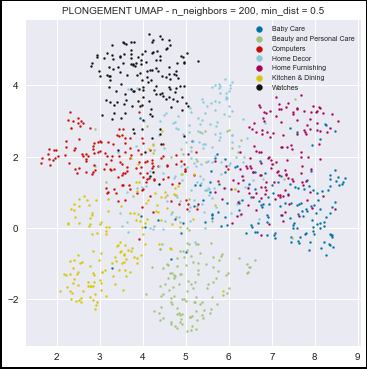

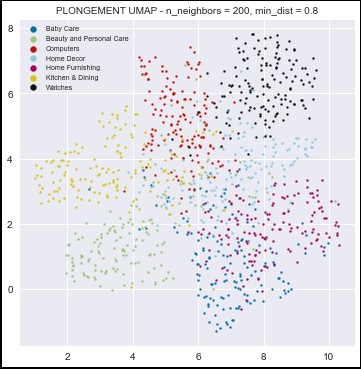

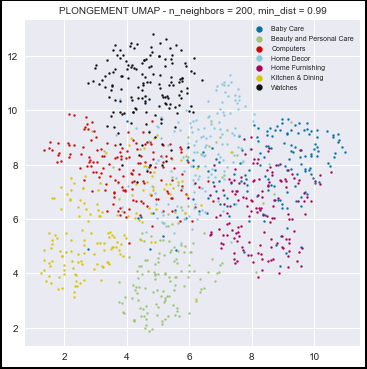

In [16]:
for n_neighbors in (100, 200):
    for min_dist in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
        draw_umap(feat_pca, df_source['label'], n_neighbors, min_dist)

## Clustering par k-means

### Méthode du coude sur l'inertie pour déterminer le k optimum

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


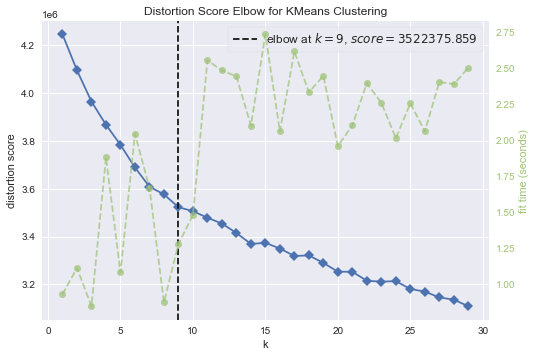

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 30))

visualizer.fit(feat_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Score de silhouette pour déterminer le k optimum

In [22]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=0).fit(feat_pca)
                for k in range(1, 15)]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


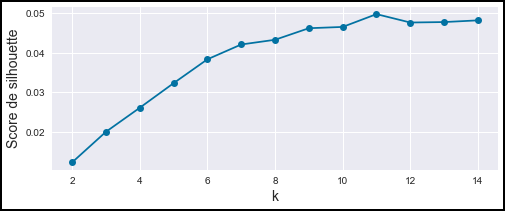

In [23]:
silhouette_scores = [silhouette_score(feat_pca, model.labels_)
                     for model in kmeans_per_k[1:]]  # k doit être > 1

plt.style.use('seaborn')
plt.figure(figsize=(8, 3), edgecolor='black', linewidth=4)
plt.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Score de silhouette", fontsize=14)
plt.show()

### Diagrammes de silhouette

In [24]:
def diagramme_silhouette(data_scaled, kmeans_per_k):
    """ Affichage du diagramme de silhouette
    Args : 
    - kmeans_per_k : liste des modélisations pour k=1 (oui, k=1) à k=k_max.
    - data_scaled : dataframe pandas converti, centré et normalisé.
    Returns :
    - tracés matplotlib (pour k=2 à k=k_max).
    """
    plt.style.use('seaborn')
    plt.figure(figsize=(11, 13), edgecolor='black', linewidth=4)
    
    silhouette_scores = [silhouette_score(data_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]  # k doit être > 1

    for k in range(2, 11):
        plt.subplot(3, 3, k - 1)

        y_pred = kmeans_per_k[k - 1].labels_
        silhouette_coefficients = silhouette_samples(data_scaled,
                                                     y_pred)

        padding = len(data_scaled) // 30
        pos = padding
        ticks = []

        # on trie les clusters du plus petit au plus grand
        taille_clusters = {}
        for i in range(k):
            taille_clusters[i] = len(silhouette_coefficients[y_pred == i])
        taille_clusters = {
            k: v
            for k, v in sorted(taille_clusters.items(),
                               key=lambda item: item[1])
        }
        i_color = 0
        for i in reversed(taille_clusters.keys()):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()
            color = mpl.cm.Spectral(i_color / (k - 1))
            i_color += 1
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)),
                              0,
                              coeffs,
                              facecolor=color,
                              edgecolor=color,
                              alpha=1)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(
            FixedFormatter(list(reversed(taille_clusters.keys()))))
        if k in (2, 5, 8):
            plt.ylabel("Cluster")
        plt.gca().set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        if k in (8, 9, 10):
            plt.xlabel("Coefficient de silhouette")
        plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
        plt.title("$k={}$".format(k), fontsize=14)

    plt.show()

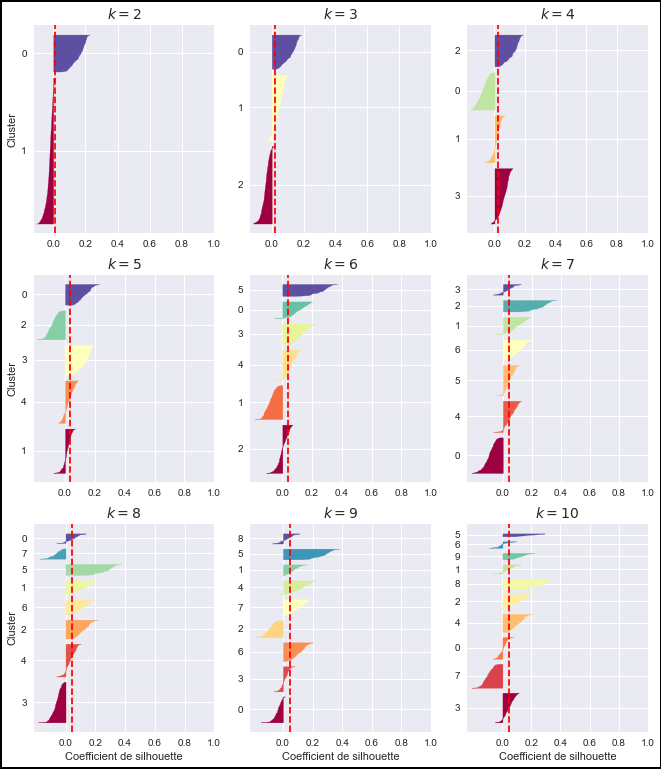

In [25]:
diagramme_silhouette(feat_pca, kmeans_per_k)

### Adjusted Rand Score pour les 7 catégories labellisées

#### Conditions standard de PCA (99% d'inertie)

In [26]:
model = KMeans(n_clusters=7, random_state=0, n_init=200).fit(feat_pca)
cprint(
    f"ARI : {adjusted_rand_score(df_source['label'], model.labels_)}", 'red')

ARI : 0.4955182634860406


#### Résultats issus de modifications de l'étape de PCA

###### Sans StandardScaler

On omet le StandardScaler avant la PCA.  
C'est globalement un peu meilleur avec StandardScaler.  
Note : 803 dimensions (vs 850) avec PCA à 99% d'inertie.  

In [190]:
model = KMeans(n_clusters=7, random_state=0, n_init=200).fit(feat_pca)
print("ARI :", adjusted_rand_score(df_source['label'], model.labels_))

ARI : 0.4768143608291434


###### Sans PCA (et avec StandardScaler)

4096 dimensions

In [216]:
model = KMeans(n_clusters=7, random_state=0, n_init=20000).fit(feat_pca)
print("ARI :", adjusted_rand_score(df_source['label'], model.labels_))

ARI : 0.49272122875957286


###### PCA à 95% d'inertie

581 dimensions post PCA  

In [186]:
model = KMeans(n_clusters=7, random_state=0, n_init=200).fit(feat_pca)
print("ARI :", adjusted_rand_score(df_source['label'], model.labels_))

ARI : 0.49752548907902355


###### PCA à 90% d'inertie

414 dimensions post PCA  

In [184]:
model = KMeans(n_clusters=7, random_state=0, n_init=200).fit(feat_pca)
print("ARI :", adjusted_rand_score(df_source['label'], model.labels_))

ARI : 0.4915546841879664


###### PCA à 80% d'inertie

235 dimensions post PCA  

In [194]:
model = KMeans(n_clusters=7, random_state=0, n_init=200).fit(feat_pca)
print("ARI :", adjusted_rand_score(df_source['label'], model.labels_))

ARI : 0.4965216221037307


###### PCA à 60% d'inertie

82 dimensions post PCA  

In [197]:
model = KMeans(n_clusters=7, random_state=0, n_init=200).fit(feat_pca)
print("ARI :", adjusted_rand_score(df_source['label'], model.labels_))

ARI : 0.4924223368835112


###### PCA à 40% d'inertie

27 dimensions post PCA  

In [199]:
model = KMeans(n_clusters=7, random_state=0, n_init=200).fit(feat_pca)
print("ARI :", adjusted_rand_score(df_source['label'], model.labels_))

ARI : 0.49312135421548947


###### PCA à 20% d'inertie

7 dimensions post PCA  

In [201]:
model = KMeans(n_clusters=7, random_state=0, n_init=200).fit(feat_pca)
print("ARI :", adjusted_rand_score(df_source['label'], model.labels_))

ARI : 0.5159241544434252


###### PCA => 3 dimensions

In [208]:
model = KMeans(n_clusters=7, random_state=0, n_init=200).fit(feat_pca)
print("ARI :", adjusted_rand_score(df_source['label'], model.labels_))

ARI : 0.46549647321688403


###### PCA => 2 dimensions

In [210]:
model = KMeans(n_clusters=7, random_state=0, n_init=200).fit(feat_pca)
print("ARI :", adjusted_rand_score(df_source['label'], model.labels_))

ARI : 0.347854499444082


###### PCA => 1 dimension

In [212]:
model = KMeans(n_clusters=7, random_state=0, n_init=200).fit(feat_pca)
print("ARI :", adjusted_rand_score(df_source['label'], model.labels_))

ARI : 0.20887099064066397


### Comparaison graphique entre les valeurs "true" et le partitionnement proposé par le k-means

#### k-means 7 clusters

In [27]:
model = kmeans_per_k[6]
model

KMeans(n_clusters=7, random_state=0)

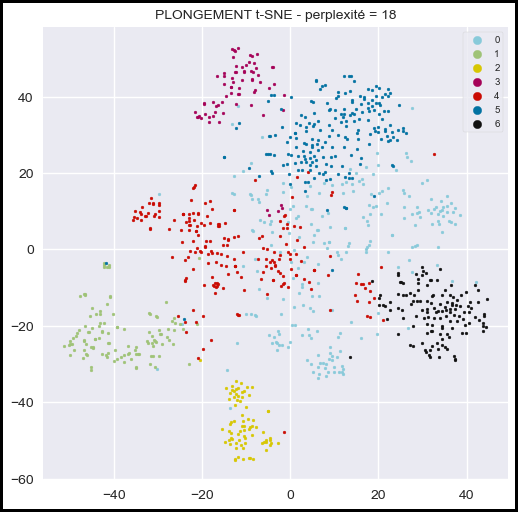

In [28]:
plt.style.use('seaborn')
draw_tsne(feat_pca, [18], model.labels_, 'cgymrbk')

#### Pour rappel, les labels "true"

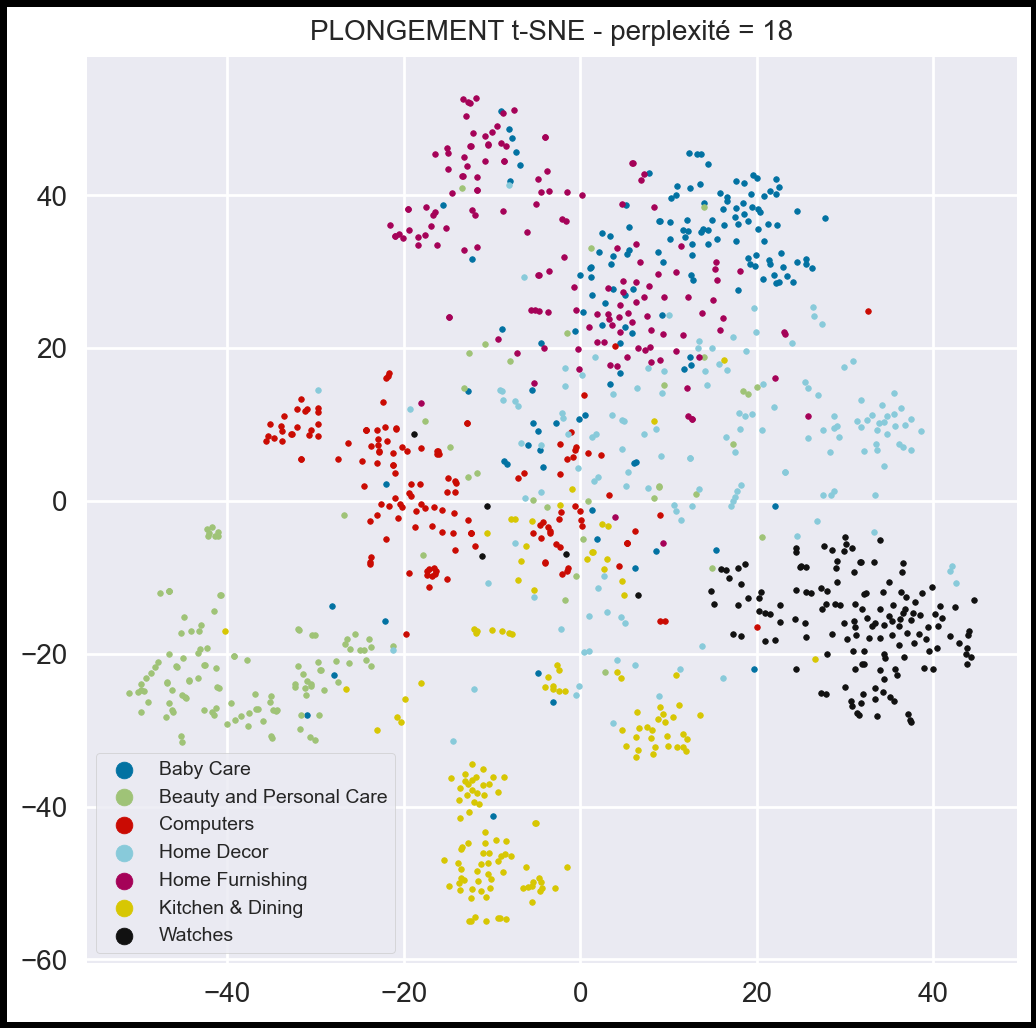

In [76]:
draw_tsne(feat_pca, [18], df_source['label'], dpi=200)

#### Matrice de confusion

In [26]:
conf_mat = confusion_matrix(df_source['int_label'], model.labels_)
df_conf = pd.DataFrame(conf_mat, columns=range(7), index=labels)
display(df_conf)

,0,1,2,3,4,5,6
Beauty and Personal Care,15,109,0,1,18,7,0
Computers,5,1,0,0,144,0,0
Baby Care,22,3,1,10,5,109,0
Home Decor,135,1,0,3,7,2,2
Home Furnishing,7,0,0,58,1,84,0
Kitchen & Dining,51,3,76,0,18,1,1
Watches,3,0,0,0,16,0,131


In [27]:
corresp = np.argmax(conf_mat, axis=1)
corresp

array([1, 4, 5, 0, 5, 2, 6], dtype=int64)

In [28]:
len(np.unique(corresp))

6

In [29]:
# matrice de confusion réorganisée avec les true positives sur la diagonale
df_conf = df_conf[[1, 4, 5, 0, 3, 2, 6]]
df_conf

,1,4,5,0,3,2,6
Beauty and Personal Care,109,18,7,15,1,0,0
Computers,1,144,0,5,0,0,0
Baby Care,3,5,109,22,10,1,0
Home Decor,1,7,2,135,3,0,2
Home Furnishing,0,1,84,7,58,0,0
Kitchen & Dining,3,18,1,51,0,76,1
Watches,0,16,0,3,0,0,131


In [30]:
df_conf.columns=labels
df_conf

,Beauty and Personal Care,Computers,Baby Care,Home Decor,Home Furnishing,Kitchen & Dining,Watches
Beauty and Personal Care,109,18,7,15,1,0,0
Computers,1,144,0,5,0,0,0
Baby Care,3,5,109,22,10,1,0
Home Decor,1,7,2,135,3,0,2
Home Furnishing,0,1,84,7,58,0,0
Kitchen & Dining,3,18,1,51,0,76,1
Watches,0,16,0,3,0,0,131


In [31]:
df_conf.astype('int32').da.export_metrics(
    ['accuracy', 'precision', 'recall', 'f1', 'specificity']).drop(columns=['micro-average'])

,Beauty and Personal Care,Computers,Baby Care,Home Decor,Home Furnishing,Kitchen & Dining,Watches
accuracy,0.953333,0.932381,0.871429,0.887619,0.899048,0.928571,0.979048
precision,0.931624,0.688995,0.536946,0.567227,0.805556,0.987013,0.977612
recall,0.726667,0.960000,0.726667,0.900000,0.386667,0.506667,0.873333
f1,0.816479,0.802228,0.617564,0.695876,0.522523,0.669604,0.922535
specificity,0.991111,0.927778,0.895556,0.885556,0.984444,0.998889,0.996667


#### Accuracy (exactitude) globale après attribution manuelle des labels

In [32]:
model.labels_ 

array([3, 5, 5, ..., 3, 0, 0])

In [33]:
arr_0 = (model.labels_ == 0)
arr_1 = (model.labels_ == 1)
arr_2 = (model.labels_ == 2)
arr_3 = (model.labels_ == 3)
arr_4 = (model.labels_ == 4)
arr_5 = (model.labels_ == 5)
arr_6 = (model.labels_ == 6)

# [1, 4, 5, 0, 3, 2, 6]
labels_reattribues = 0*arr_1 + 1*arr_4 + 2*arr_5 + 3*arr_0 + 4*arr_3 + 5*arr_2 + 6*arr_6
labels_reattribues

array([4, 2, 2, ..., 4, 3, 3])

In [34]:
print("accuracy_score : %.2f" % accuracy_score(df_source['int_label'], labels_reattribues))

accuracy_score : 0.73


Note : on retrouve bien cette valeur en divisant la somme de la diagonale de la matrice de confusion par 1050.

## Clustering par DBSCAN

In [29]:
clustering = DBSCAN(eps=0.01, min_samples=2).fit(feat_pca)

In [30]:
label_list = np.unique(clustering.labels_)
label_list

array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

In [32]:
Counter(clustering.labels_)

Counter({-1: 1028, 0: 3, 1: 7, 2: 3, 3: 2, 4: 4, 5: 3})

DBSCAN ne parvient pas à former des clusters. Il ne trouve que des noisy samples (label -1).

## Classification ascendante hiérarchique

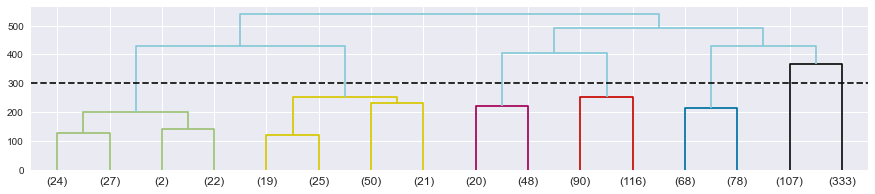

In [33]:
linkage_matrix = linkage(feat_pca, method='ward')
plt.figure(figsize=(15, 3), edgecolor='black')
plt.axhline(300, c='k', linestyle='--')
_ = dendrogram(linkage_matrix, orientation='top', p=3, truncate_mode='level')

Il y a sept clusters apparents. Mais les distributions ne correspondent absolument pas aux effectifs des tru_labels.  

### Adjusted Rand Score pour les 7 catégories labellisées

In [34]:
labels_ = fclusterdata(feat_pca, t=7, criterion='maxclust', method='ward')
# fclusterdata retourne des labels qui s'incrémentent à partir de 1 (on veut un incrément depuis 0)
labels_ -= 1
labels_

array([2, 3, 3, ..., 6, 6, 3], dtype=int32)

In [35]:
cprint(f"ARI : {adjusted_rand_score(df_source['label'], labels_)}", 'red')

ARI : 0.44953923242022115


### Matrice de confusion

In [52]:
conf_mat = confusion_matrix(df_source['int_label'], labels_)
conf_mat

array([[  0, 113,   1,   6,   2,   4,  24],
       [  0,   0,   0,   1,   1,  99,  49],
       [  1,   1,   6, 112,   0,   1,  29],
       [  0,   0,   0,   9,   0,   0, 141],
       [  0,   0,  61,  76,   0,   0,  13],
       [ 74,   1,   0,   2,   1,   1,  71],
       [  0,   0,   0,   0, 142,   2,   6]], dtype=int64)

In [53]:
df_conf = pd.DataFrame(conf_mat, columns=range(7), index=labels)
display(df_conf)

,0,1,2,3,4,5,6
Beauty and Personal Care,0,113,1,6,2,4,24
Computers,0,0,0,1,1,99,49
Baby Care,1,1,6,112,0,1,29
Home Decor,0,0,0,9,0,0,141
Home Furnishing,0,0,61,76,0,0,13
Kitchen & Dining,74,1,0,2,1,1,71
Watches,0,0,0,0,142,2,6


In [54]:
corresp = np.argmax(conf_mat, axis=1)
corresp

array([1, 5, 3, 6, 3, 0, 4], dtype=int64)

In [55]:
len(np.unique(corresp))

6

In [56]:
# matrice de confusion réorganisée avec les true positives sur la diagonale
df_conf = df_conf[[1, 5, 3, 6, 2, 0, 4]]
df_conf

,1,5,3,6,2,0,4
Beauty and Personal Care,113,4,6,24,1,0,2
Computers,0,99,1,49,0,0,1
Baby Care,1,1,112,29,6,1,0
Home Decor,0,0,9,141,0,0,0
Home Furnishing,0,0,76,13,61,0,0
Kitchen & Dining,1,1,2,71,0,74,1
Watches,0,2,0,6,0,0,142


In [57]:
df_conf.columns = labels
df_conf

,Beauty and Personal Care,Computers,Baby Care,Home Decor,Home Furnishing,Kitchen & Dining,Watches
Beauty and Personal Care,113,4,6,24,1,0,2
Computers,0,99,1,49,0,0,1
Baby Care,1,1,112,29,6,1,0
Home Decor,0,0,9,141,0,0,0
Home Furnishing,0,0,76,13,61,0,0
Kitchen & Dining,1,1,2,71,0,74,1
Watches,0,2,0,6,0,0,142


In [58]:
df_conf.astype('int32').da.export_metrics(['accuracy', 'precision', 'recall', 'f1', 'specificity'])

,Beauty and Personal Care,Computers,Baby Care,Home Decor,Home Furnishing,Kitchen & Dining,Watches,micro-average
accuracy,0.962857,0.943810,0.874286,0.808571,0.908571,0.926667,0.988571,0.916190
precision,0.982609,0.925234,0.543689,0.423423,0.897059,0.986667,0.972603,0.706667
recall,0.753333,0.660000,0.746667,0.940000,0.406667,0.493333,0.946667,0.706667
f1,0.852830,0.770428,0.629213,0.583851,0.559633,0.657778,0.959459,0.706667
specificity,0.997778,0.991111,0.895556,0.786667,0.992222,0.998889,0.995556,0.951111


## Clustering par Affinity Propagation

In [36]:
model = AffinityPropagation(random_state=0, max_iter=10000, preference=-80000)
model.fit(feat_pca)

AffinityPropagation(max_iter=10000, preference=-80000, random_state=0)

In [37]:
model.n_iter_

43

In [38]:
labels_ = model.labels_
print("Nb de clusters :", len(np.unique(labels_)))
print("Effectifs des clusters :")
bincounts = np.bincount(labels_)
print(bincounts)
print("Fréquences :")
print([round(bincount / sum(bincounts) * 100 * 10) / 10 for bincount in bincounts])

Nb de clusters : 7
Effectifs des clusters :
[170 131  79 171 237  50 212]
Fréquences :
[16.2, 12.5, 7.5, 16.3, 22.6, 4.8, 20.2]


### Adjusted Rand Score pour les 7 catégories labellisées

In [39]:
cprint("ARI : {:.2f}".format(adjusted_rand_score(df_source['label'], labels_)), 'red')

ARI : 0.33


## Clustering par Mean Shift

In [364]:
model = MeanShift(bandwidth=2)
model.fit(feat_pca)

MeanShift(bandwidth=2)

In [365]:
model.n_iter_

0

In [366]:
labels_ = model.labels_
print("Nb de clusters :", len(np.unique(labels_)))
print("Effectifs des clusters :")
bincounts = np.bincount(labels_)
print(bincounts)
print("Fréquences :")
print([round(bincount / sum(bincounts) * 100 * 10) / 10 for bincount in bincounts])

Nb de clusters : 1034
Effectifs des clusters :
[7 4 3 ... 1 1 1]
Fréquences :
[0.7, 0.4, 0.3, 0.3, 0.3, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0

Avec nos données, impossible de trouver un plus faible nb de clusters.

## Clustering par BIRCH

In [40]:
model = Birch(n_clusters=7)
model.fit(feat_pca)

Birch(n_clusters=7)

In [41]:
labels_ = model.labels_
print("Nb de clusters :", len(np.unique(labels_)))
print("Effectifs des clusters :")
bincounts = np.bincount(labels_)
print(bincounts)
print("Fréquences :")
print([round(bincount / sum(bincounts) * 100 * 10) / 10 for bincount in bincounts])

Nb de clusters : 7
Effectifs des clusters :
[346 115 114 206  75  48 146]
Fréquences :
[33.0, 11.0, 10.9, 19.6, 7.1, 4.6, 13.9]


### Adjusted Rand Score pour les 7 catégories labellisées

In [42]:
cprint("ARI : {:.2f}".format(adjusted_rand_score(
    df_source['label'], labels_)), 'red')

ARI : 0.43


## Classification par SVM

In [86]:
accuracy_svm(feat_pca, df_source['int_label'], 100)

Accuracy = 0.836
